In [68]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.stats as stats

In [7]:
# Question - 1
value = random.randint(1, 100)
print(value)

48


Text(0, 0.5, 'Probability')

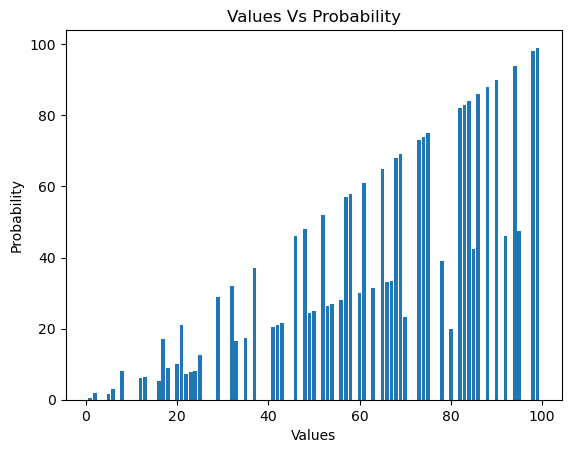

In [44]:
# Question - 2
sample = np.random.randint(1, 100, 100)
N = len(sample)
unique, counts = np.unique(sample, return_counts = True)
probability = unique / counts
plt.bar(unique, probability)
plt.title("Values Vs Probability")
plt.xlabel("Values")
plt.ylabel("Probability")

In [46]:
# Question - 3
import numpy as np
import scipy.stats as stats

def bernoulli_pdf(x, p):
    """
    Calculates the Probability Mass Function (PMF) of a Bernoulli distribution.

    Args:
        x: The value(s) for which to calculate the PMF. Can be a single value or a NumPy array.
        p: The probability of success (a value between 0 and 1).

    Returns:
        The PMF value(s) at x. Returns 0 if x is not 0 or 1. If x is an array, returns an array of the same size.
        Raises a TypeError if x or p are of the wrong type.
        Raises a ValueError if p is not between 0 and 1.
    """

    if not isinstance(p, (int, float)):
        raise TypeError("p must be a number (int or float).")
    if not 0 <= p <= 1:
        raise ValueError("p must be between 0 and 1 (inclusive).")

    if isinstance(x, np.ndarray):
        return stats.bernoulli.pmf(x, p)  # Most efficient for NumPy arrays
    elif isinstance(x, (int, float)):
        return stats.bernoulli.pmf(x, p) # Most efficient for single values as well
    else:
        raise TypeError("x must be a number or a NumPy array.")



p = 0.3  # Probability of success

# Single value:
x = 1
pdf_value = bernoulli_pdf(x, p)
print(f"P(X={x}) = {pdf_value}")

x = 0
pdf_value = bernoulli_pdf(x, p)
print(f"P(X={x}) = {pdf_value}")

# NumPy array:
x_values = np.array([0, 1, 0, 1, 2])
pdf_values = bernoulli_pdf(x_values, p)
print(f"PDF values for x_values: {pdf_values}")

x_values = np.array([0, 1, 0, 1])
pdf_values = bernoulli_pdf(x_values, p)
print(f"PDF values for x_values: {pdf_values}")

# Error handling:
x = "a"  # incorrect type
try:
    pdf_values = bernoulli_pdf(x, p)
    print(f"pdf value : {pdf_values}")
except TypeError as e:
    print(e)

p = 1.2 #incorrect p value
try:
    pdf_values = bernoulli_pdf(x, p)
    print(f"pdf value : {pdf_values}")
except ValueError as e:
    print(e)

P(X=1) = 0.3
P(X=0) = 0.7000000000000002
PDF values for x_values: [0.7 0.3 0.7 0.3 0. ]
PDF values for x_values: [0.7 0.3 0.7 0.3]
x must be a number or a NumPy array.
p must be between 0 and 1 (inclusive).


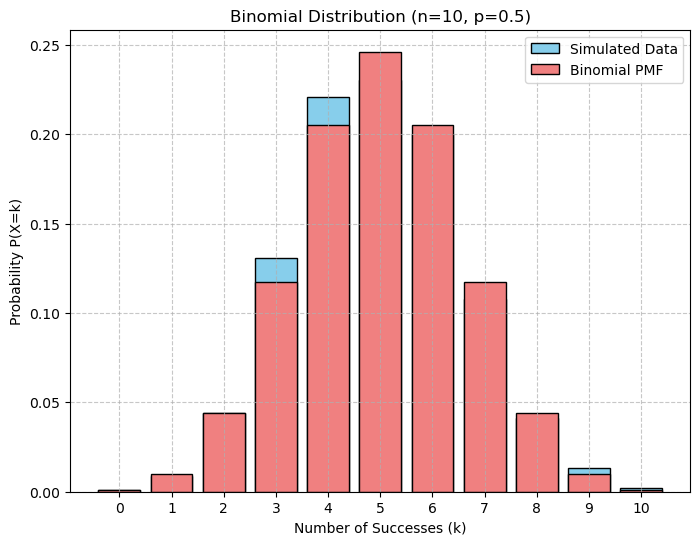

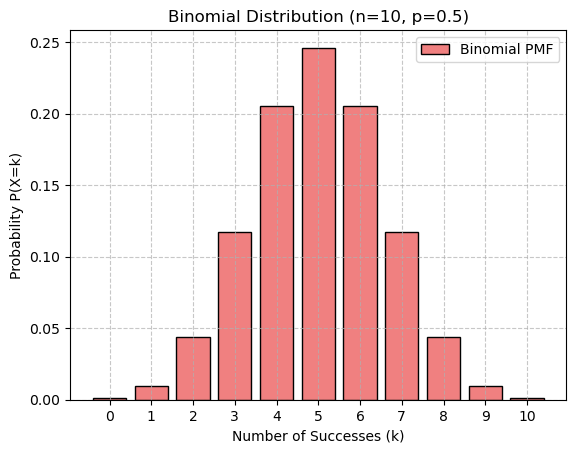

In [47]:
# Question - 4
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Parameters for the binomial distribution
n = 10  # Number of trials
p = 0.5  # Probability of success

# Simulate the binomial distribution
num_samples = 1000  # Number of random samples to generate. Increase this for a smoother histogram.
samples = np.random.binomial(n, p, num_samples)

# Plot the histogram
plt.figure(figsize=(8, 6)) # Adjust figure size

# Option 1: Using plt.hist() (simpler)
plt.hist(samples, bins=np.arange(0, n + 2) - 0.5,  # Bins centered on integers for discrete data
         density=True, rwidth=0.8, color='skyblue', edgecolor='black', label='Simulated Data') # rwidth makes bars thinner

# Option 2: Using scipy.stats.binom.pmf (more accurate representation of the distribution)
x = np.arange(0, n + 1)
pmf = stats.binom.pmf(x, n, p)
plt.bar(x, pmf, width=0.8, color='lightcoral', edgecolor='black', label='Binomial PMF')

plt.xlabel('Number of Successes (k)')
plt.ylabel('Probability P(X=k)')
plt.title('Binomial Distribution (n=10, p=0.5)')
plt.xticks(np.arange(0, n + 1))  # Set x-axis ticks at integer values
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



#Alternative way to plot the PMF using only numpy:
# Calculate the PMF
x = np.arange(0, n + 1)
from scipy.special import comb #for nCk calculation
probabilities = np.array([comb(n, k) * (p**k) * ((1-p)**(n-k)) for k in x])

plt.bar(x, probabilities, width=0.8, color='lightcoral', edgecolor='black', label='Binomial PMF')
plt.xlabel('Number of Successes (k)')
plt.ylabel('Probability P(X=k)')
plt.title('Binomial Distribution (n=10, p=0.5)')
plt.xticks(np.arange(0, n + 1))  # Set x-axis ticks at integer values
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

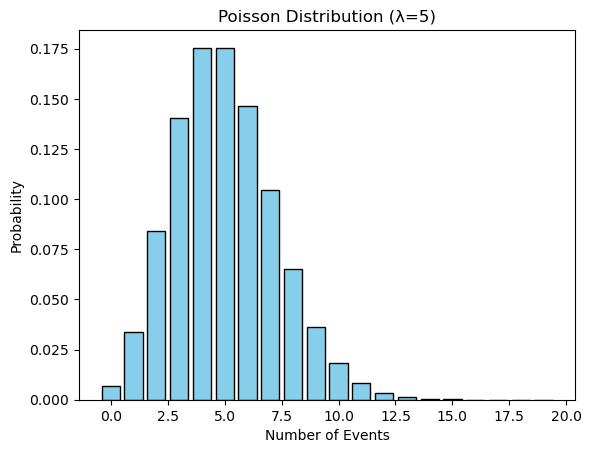

In [50]:
# Question - 5
lam = 5  # Average rate of events
x = np.arange(0, 20)  # Range of values for x
pmf = stats.poisson.pmf(x, lam)
plt.bar(x, pmf, width=0.8, color='skyblue', edgecolor='black')
plt.title('Poisson Distribution (λ=5)')
plt.xlabel('Number of Events')
plt.ylabel('Probability')
plt.show()

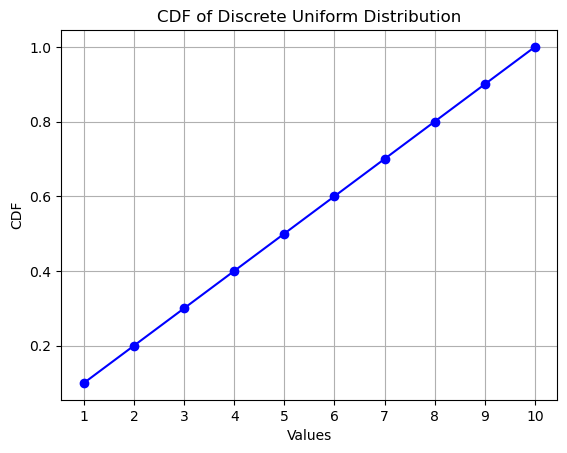

In [51]:
# Question - 6
a = 1
b = 10
x = np.arange(a, b + 1)
cdf = stats.randint.cdf(x, a, b + 1)
plt.plot(x, cdf, marker='o', linestyle='-', color='blue')
plt.title('CDF of Discrete Uniform Distribution')
plt.xlabel('Values')
plt.ylabel('CDF')
plt.xticks(x)
plt.grid(True)
plt.show()

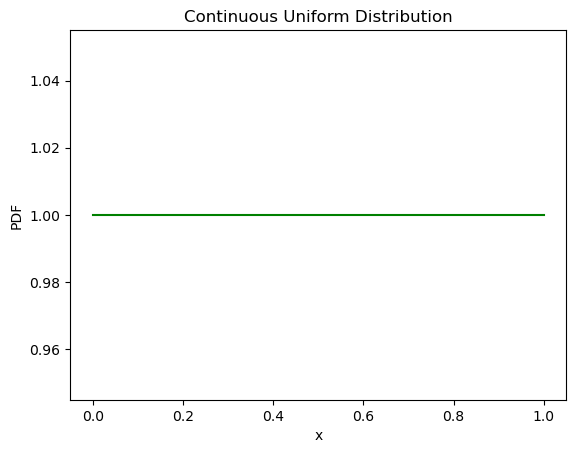

In [52]:
# Question - 7
a = 0
b = 1
x = np.linspace(a, b, 100)
pdf = stats.uniform.pdf(x, a, b)
plt.plot(x, pdf, color='green')
plt.title('Continuous Uniform Distribution')
plt.xlabel('x')
plt.ylabel('PDF')
plt.show()

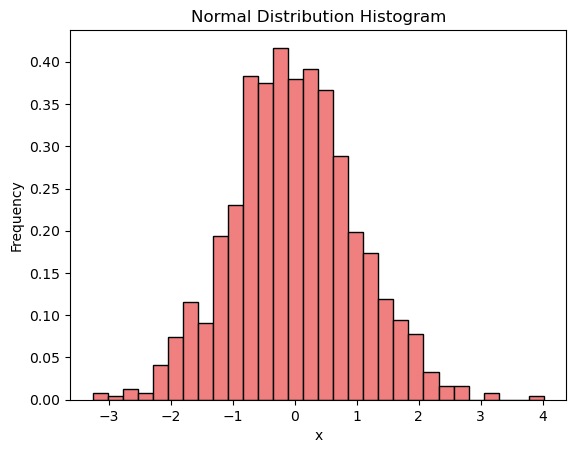

In [53]:
# Question - 8
mu = 0
sigma = 1
data = np.random.normal(mu, sigma, 1000)
plt.hist(data, bins=30, density=True, color='lightcoral', edgecolor='black')
plt.title('Normal Distribution Histogram')
plt.xlabel('x')
plt.ylabel('Frequency')
plt.show()

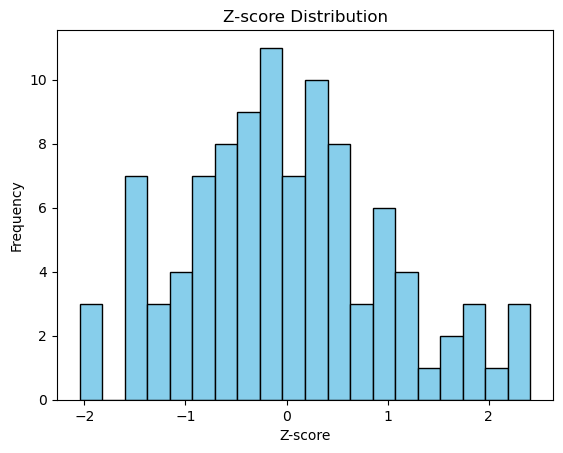

In [54]:
# Question - 9
data = np.random.normal(50, 10, 100)  # Example dataset
z_scores = (data - np.mean(data)) / np.std(data)
plt.hist(z_scores, bins=20, color='skyblue', edgecolor='black')
plt.title('Z-score Distribution')
plt.xlabel('Z-score')
plt.ylabel('Frequency')
plt.show()

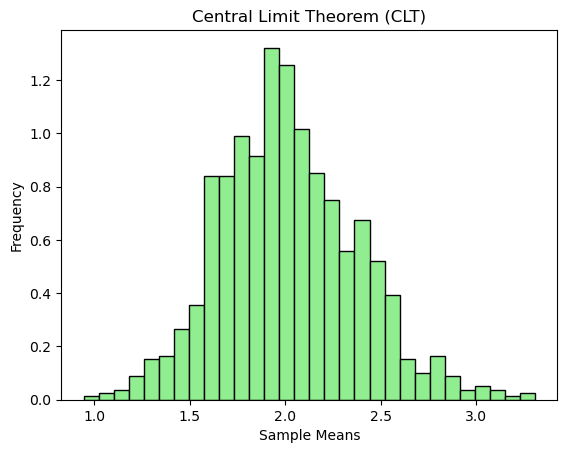

In [55]:
# Question - 10
num_samples = 1000
sample_means = []
for _ in range(num_samples):
    sample = np.random.exponential(scale=2, size=30)  # Non-normal distribution (exponential)
    sample_means.append(np.mean(sample))

plt.hist(sample_means, bins=30, density=True, color='lightgreen', edgecolor='black')
plt.title('Central Limit Theorem (CLT)')
plt.xlabel('Sample Means')
plt.ylabel('Frequency')
plt.show()

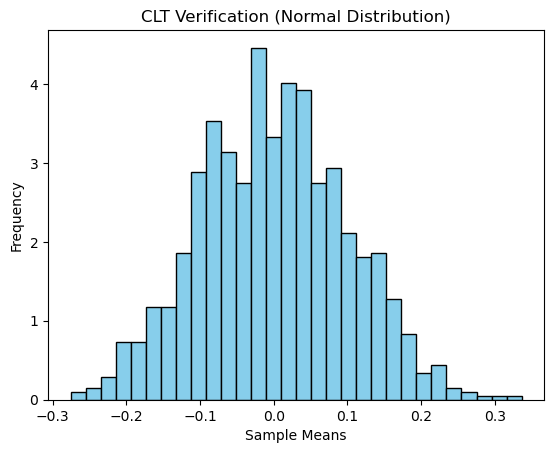

In [56]:
# Question 11
num_samples = 1000
sample_means = []
for _ in range(num_samples):
    sample = np.random.normal(0, 1, 100)  # Normal distribution
    sample_means.append(np.mean(sample))

plt.hist(sample_means, bins=30, density=True, color='skyblue', edgecolor='black')
plt.title('CLT Verification (Normal Distribution)')
plt.xlabel('Sample Means')
plt.ylabel('Frequency')
plt.show()


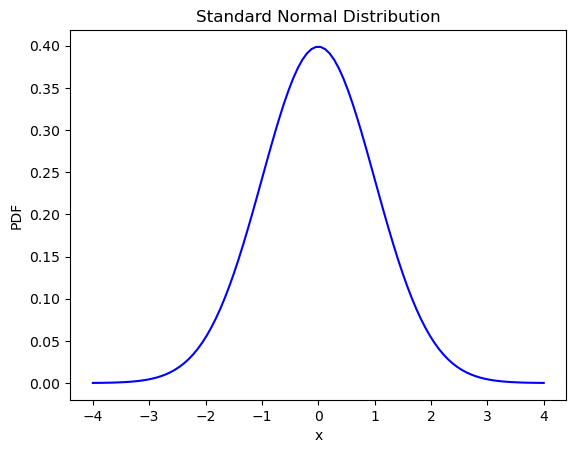

In [58]:
# Question - 12
x = np.linspace(-4, 4, 100)
pdf = stats.norm.pdf(x, 0, 1)
plt.plot(x, pdf, color='blue')
plt.title('Standard Normal Distribution')
plt.xlabel('x')
plt.ylabel('PDF')
plt.show()

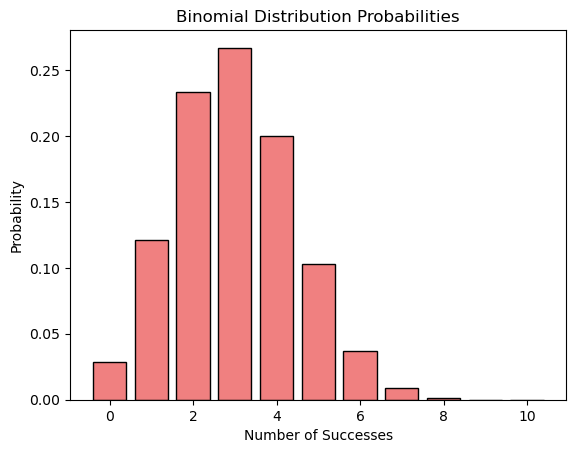

In [59]:
# Question - 13
n = 10
p = 0.3
x = np.arange(0, n + 1)
probabilities = stats.binom.pmf(x, n, p)
plt.bar(x, probabilities, width=0.8, color='lightcoral', edgecolor='black')
plt.title('Binomial Distribution Probabilities')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.show()

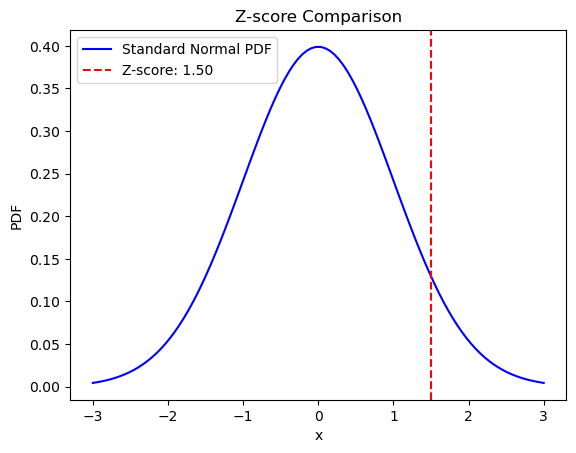

In [60]:
# Question - 14
data_point = 65
data = np.random.normal(50, 10, 100)
z_score = (data_point - np.mean(data)) / np.std(data)
x = np.linspace(-3, 3, 100)
pdf = stats.norm.pdf(x, 0, 1)
plt.plot(x, pdf, color='blue', label='Standard Normal PDF')
plt.axvline(z_score, color='red', linestyle='--', label=f'Z-score: {z_score:.2f}')
plt.title('Z-score Comparison')
plt.xlabel('x')
plt.ylabel('PDF')
plt.legend()
plt.show()


In [62]:
# Question 15
sample_mean = 60
population_mean = 55
population_std = 10
sample_size = 50
alpha = 0.05  # Significance level

z = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))
p_value = 2 * (1 - stats.norm.cdf(abs(z)))  # Two-tailed test

print(f"Z-statistic: {z:.2f}")
print(f"P-value: {p_value:.3f}")

if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

# 12. Confidence Interval
data = np.random.normal(100, 15, 100)
confidence_level = 0.95
mean = np.mean(data)
std = np.std(data)
n = len(data)

margin_of_error = stats.t.ppf((1 + confidence_level) / 2, n - 1) * (std / np.sqrt(n))  # Using t-distribution
lower_bound = mean - margin_of_error
upper_bound = mean + margin_of_error

print(f"Confidence Interval: ({lower_bound:.2f}, {upper_bound:.2f})")


Z-statistic: 3.54
P-value: 0.000
Reject the null hypothesis.
Confidence Interval: (98.05, 103.36)


In [63]:
# Question - 16
data = np.random.normal(100, 15, 100)
confidence_level = 0.95
mean = np.mean(data)
std = np.std(data)
n = len(data)

margin_of_error = stats.norm.ppf((1 + confidence_level) / 2) * (std / np.sqrt(n))  # Using z-distribution (known std)
lower_bound = mean - margin_of_error
upper_bound = mean + margin_of_error

print(f"Confidence Interval: ({lower_bound:.2f}, {upper_bound:.2f})")

Confidence Interval: (94.02, 99.44)


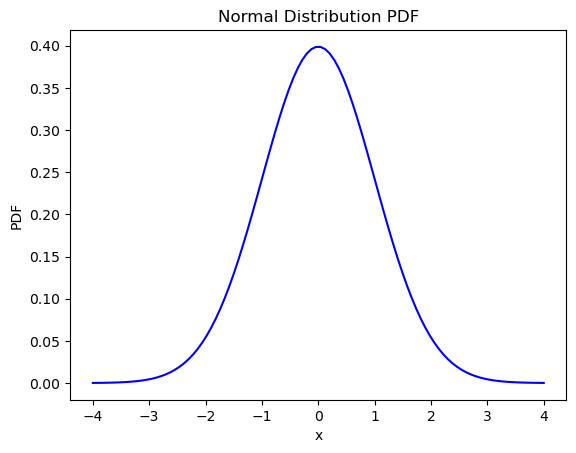

In [64]:
# Question - 17
mu = 0
sigma = 1
x = np.linspace(-4, 4, 100)
pdf = stats.norm.pdf(x, mu, sigma)
plt.plot(x, pdf, color='blue')
plt.title('Normal Distribution PDF')
plt.xlabel('x')
plt.ylabel('PDF')
plt.show()


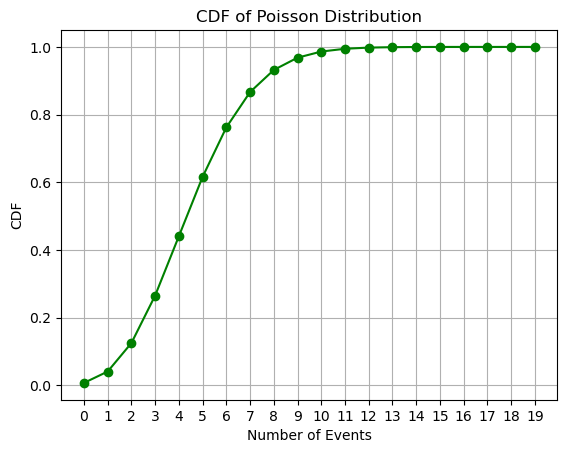

In [65]:
# Question - 18
lam = 5
x = np.arange(0, 20)
cdf = stats.poisson.cdf(x, lam)
plt.plot(x, cdf, marker='o', linestyle='-', color='green')
plt.title('CDF of Poisson Distribution')
plt.xlabel('Number of Events')
plt.ylabel('CDF')
plt.xticks(x)
plt.grid(True)
plt.show()

In [69]:
# Question - 19
sample_mean = 60
population_mean = 55
population_std = 10
sample_size = 50
alpha = 0.05  # Significance level

z = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))
p_value = 2 * (1 - stats.norm.cdf(abs(z)))  # Two-tailed test

print(f"Z-statistic: {z:.2f}")
print(f"P-value: {p_value:.3f}")

if p_value < alpha:
    print("Reject the null hypothesis. There is sufficient evidence to suggest the sample mean is different from the population mean.")
else:
    print("Fail to reject the null hypothesis. There is not sufficient evidence to suggest the sample mean is different from the population mean.")

Z-statistic: 3.54
P-value: 0.000
Reject the null hypothesis. There is sufficient evidence to suggest the sample mean is different from the population mean.


In [70]:
# Question - 20
data = np.random.normal(100, 15, 100)
confidence_level = 0.95
mean = np.mean(data)
std = np.std(data)
n = len(data)

margin_of_error = stats.t.ppf((1 + confidence_level) / 2, n - 1) * (std / np.sqrt(n))  # Using t-distribution
lower_bound = mean - margin_of_error
upper_bound = mean + margin_of_error

print(f"Confidence Interval: ({lower_bound:.2f}, {upper_bound:.2f})")
print(f"We are 95% confident that the true population mean lies within this interval.")


Confidence Interval: (97.40, 103.00)
We are 95% confident that the true population mean lies within this interval.


In [71]:
# Question - 21
data = np.random.normal(100, 15, 100)
confidence_level = 0.95
mean = np.mean(data)
std = np.std(data)
n = len(data)

margin_of_error = stats.norm.ppf((1 + confidence_level) / 2) * (std / np.sqrt(n))  # Using z-distribution (known std)
lower_bound = mean - margin_of_error
upper_bound = mean + margin_of_error

print(f"Confidence Interval: ({lower_bound:.2f}, {upper_bound:.2f})")
print(f"We are 95% confident that the true population mean lies within this interval.")


Confidence Interval: (96.17, 102.53)
We are 95% confident that the true population mean lies within this interval.


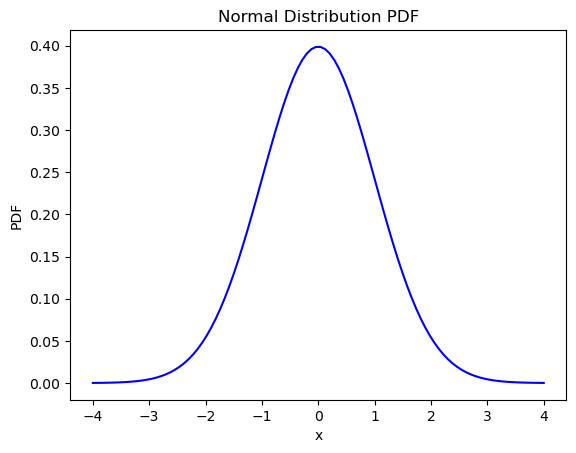

In [72]:
# Question - 22
mu = 0
sigma = 1
x = np.linspace(-4, 4, 100)
pdf = stats.norm.pdf(x, mu, sigma)
plt.plot(x, pdf, color='blue')
plt.title('Normal Distribution PDF')
plt.xlabel('x')
plt.ylabel('PDF')
plt.show()

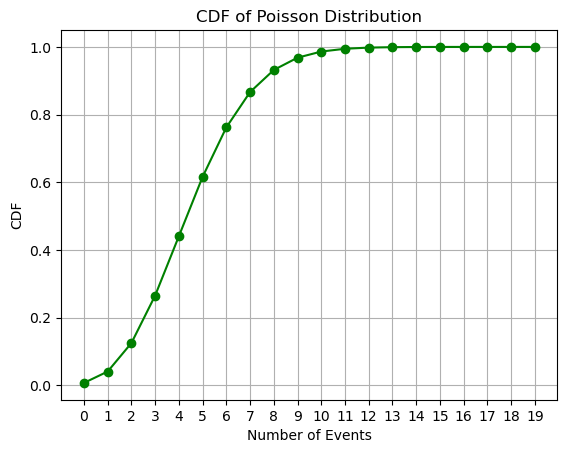

The CDF shows the probability of observing up to a certain number of events.


In [73]:
# Question - 23
lam = 5
x = np.arange(0, 20)
cdf = stats.poisson.cdf(x, lam)
plt.plot(x, cdf, marker='o', linestyle='-', color='green')
plt.title('CDF of Poisson Distribution')
plt.xlabel('Number of Events')
plt.ylabel('CDF')
plt.xticks(x)
plt.grid(True)
plt.show()
print("The CDF shows the probability of observing up to a certain number of events.")


In [74]:
# Question - 24
a = 0
b = 1
num_samples = 1000
samples = np.random.uniform(a, b, num_samples)
expected_value = (a + b) / 2
print(f"Simulated Expected Value: {np.mean(samples):.2f}")
print(f"Theoretical Expected Value: {expected_value}")

Simulated Expected Value: 0.50
Theoretical Expected Value: 0.5


Standard deviation of data1: 10.22
Standard deviation of data2: 10.37


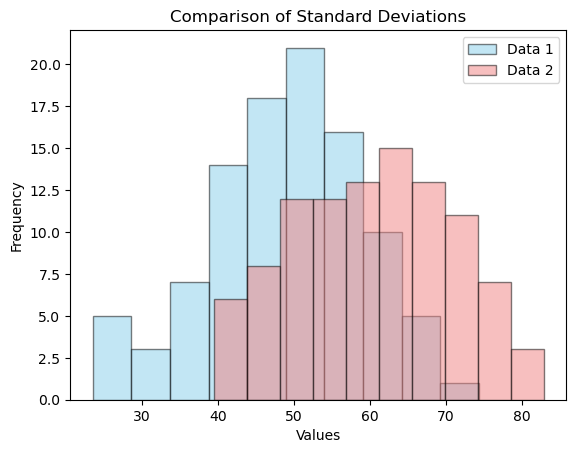

The histograms visually compare the spread of the two datasets.


In [77]:
# Question - 25
data1 = np.random.normal(50, 10, 100)
data2 = np.random.normal(60, 12, 100)
std1 = np.std(data1)
std2 = np.std(data2)
print(f"Standard deviation of data1: {std1:.2f}")
print(f"Standard deviation of data2: {std2:.2f}")
plt.hist(data1, alpha=0.5, label='Data 1', color='skyblue', edgecolor='black')
plt.hist(data2, alpha=0.5, label='Data 2', color='lightcoral', edgecolor='black')
plt.legend()
plt.title('Comparison of Standard Deviations')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()
print("The histograms visually compare the spread of the two datasets.")

In [78]:
# Question - 26
data = np.random.normal(100, 15, 100)
range_val = np.max(data) - np.min(data)
q75, q25 = np.percentile(data, [75, 25])
iqr = q75 - q25

print(f"Range: {range_val:.2f}")
print(f"Interquartile Range (IQR): {iqr:.2f}")

Range: 61.00
Interquartile Range (IQR): 20.55


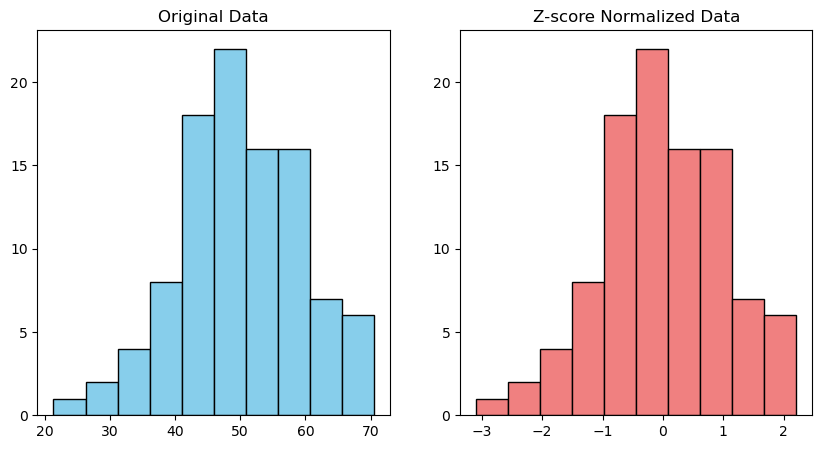

Z-score normalization transforms the data to have a mean of 0 and a standard deviation of 1.


In [79]:
# Question - 27
# 19. Z-score Normalization and Visualization
data = np.random.normal(50, 10, 100)
z_scores = (data - np.mean(data)) / np.std(data)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.hist(data, color='skyblue', edgecolor='black')
plt.title('Original Data')

plt.subplot(1,2,2)
plt.hist(z_scores, color='lightcoral', edgecolor='black')
plt.title('Z-score Normalized Data')

plt.show()
print("Z-score normalization transforms the data to have a mean of 0 and a standard deviation of 1.")


In [80]:
# Question - 28
data = np.random.normal(100, 15, 1000) #Increased sample size for better skewness/kurtosis calculation
skewness = stats.skew(data)
kurtosis = stats.kurtosis(data)

print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")

print("Skewness measures the asymmetry of the distribution.  Kurtosis measures the 'tailedness' of the distribution.")

Skewness: -0.04
Kurtosis: -0.17
Skewness measures the asymmetry of the distribution.  Kurtosis measures the 'tailedness' of the distribution.
